In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
titanic_df=pd.read_csv("C:\\Users\\GPT BANTWAL\\Documents\\titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


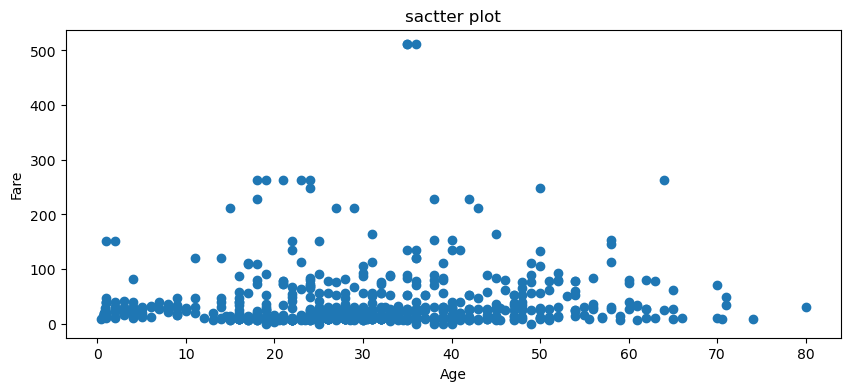

In [12]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,4))
ax.scatter(titanic_df['Age'],titanic_df['Fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.title("sactter plot")
plt.show()


<Axes: >

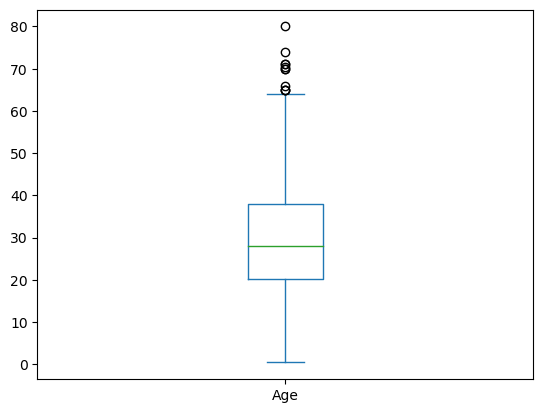

In [13]:
titanic_df['Age'].plot(kind='box')

In [15]:
q1=titanic_df['Age'].quantile(0.25)

In [16]:
q3=titanic_df['Age'].quantile(0.75)

In [17]:
iqr=q3-q1

In [18]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1+(1.5*iqr)

In [22]:
age_arr=titanic_df['Age']
outliers=age_arr[(age_arr<=lower_bound)|(age_arr>=upper_bound)]
print('The following are the outliers in the boxplot of Age:\n',outliers)

The following are the outliers in the boxplot of Age:
 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 627, dtype: float64


<Axes: ylabel='Frequency'>

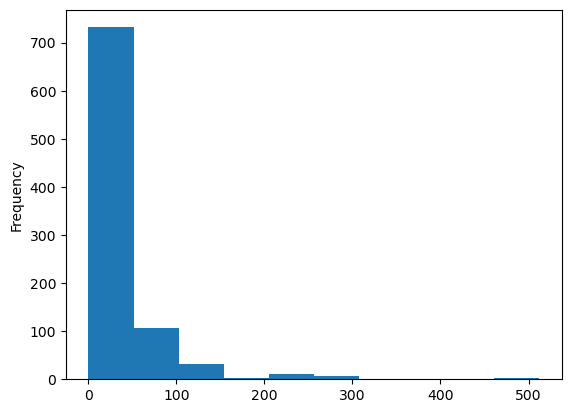

In [23]:
titanic_df['Fare'].plot(kind='hist')

In [24]:
upperIndex=titanic_df[titanic_df['Age']>upper_bound].index
titanic_df.drop(upperIndex,inplace=True)
lowerIndex=titanic_df[titanic_df['Age']<lower_bound].index
titanic_df.drop(lowerIndex,inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 5 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  264 non-null    int64  
 1   Survived     264 non-null    int64  
 2   Pclass       264 non-null    int64  
 3   Name         264 non-null    object 
 4   Sex          264 non-null    object 
 5   Age          87 non-null     float64
 6   SibSp        264 non-null    int64  
 7   Parch        264 non-null    int64  
 8   Ticket       264 non-null    object 
 9   Fare         264 non-null    float64
 10  Cabin        66 non-null     object 
 11  Embarked     263 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


In [27]:
titanic_df=pd.read_csv("C:\\Users\\GPT BANTWAL\\Documents\\titanic.csv")
fare_arr=titanic_df['Fare']
upper_cap=np.percentile(fare_arr,1)
lower_cap=np.percentile(fare_arr,99)
outliers=fare_arr[(fare_arr < upper_cap)|(fare_arr > lower_cap)]
print('The following are the outliers in the boxplot of fare:\n',outliers)

The following are the outliers in the boxplot of fare:
 27     263.0000
88     263.0000
258    512.3292
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: Fare, dtype: float64


In [30]:
for i in titanic_df['Fare']:
    if i<lower_bound:
        titanic_df['Fare']=titanic_df['Fare'].replace(i,lower_cap)
    elif i>upper_bound:
        titanic_df['Fare']=titanic_df['Fare'].replace(i,upper_cap)

In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
titanic_df=pd.read_csv("C:\\Users\\GPT BANTWAL\\Documents\\titanic.csv")

In [34]:
m=np.mean(titanic_df['Age'])
print('mean:',m)
for i in titanic_df['Age']:
    if i<lower_bound or i>upper_bound:
        titanic_df['Age']=titanic_df['Age'].replace(i,m)

mean: 29.69911764705882


In [35]:
titanic_df=pd.read_csv("C:\\Users\\GPT BANTWAL\\Documents\\titanic.csv")

In [36]:
q1=titanic_df['Age'].quantile(0.25)
q3=titanic_df['Age'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
m=titanic_df['Age'].median()
print(m)
for i in titanic_df['Age']:
    if i<lower_bound or i>upper_bound:
        titanic_df['Age']=titanic_df['Age'].replace(i,m)

28.0
